In [1]:
import numpy as np
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
# Define the paths
train_dir = 'dataset_raw/train'
val_dir = 'dataset_raw/val'
test_dir = 'dataset_raw/test'

# Image data generator for training
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary'
)

Found 6253 images belonging to 2 classes.
Found 6221 images belonging to 2 classes.
Found 6216 images belonging to 2 classes.


In [3]:
# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model summary
model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7173 - loss: 0.5757 - val_accuracy: 0.7560 - val_loss: 0.5255
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7945 - loss: 0.4816 - val_accuracy: 0.7640 - val_loss: 0.5014
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7666 - loss: 0.4946 - val_accuracy: 0.7520 - val_loss: 0.5084
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 998ms/step - accuracy: 0.7642 - loss: 0.4499 - val_accuracy: 0.7720 - val_loss: 0.5114
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7372 - loss: 0.5378 - val_accuracy: 0.7880 - val_loss: 0.4829
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 446ms/step - accuracy: 0.7780 - loss: 0.4784
Test accuracy: 76.00%


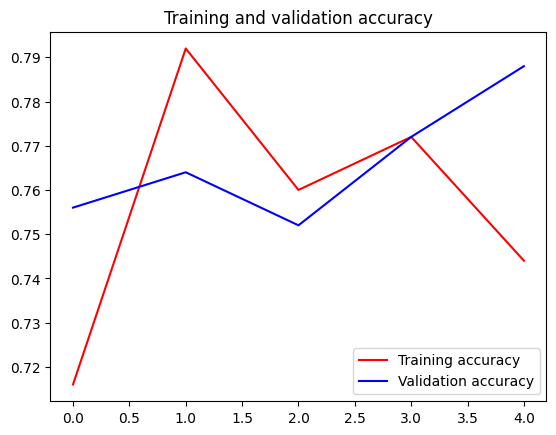

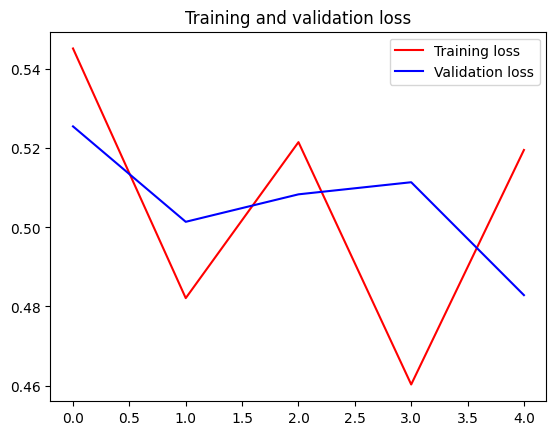

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=25,  # Number of batches to train on per epoch
    epochs=5,  # Number of epochs to train
    validation_data=val_generator,
    validation_steps=25  # Number of batches to validate on
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=10)
print(f"Test accuracy: {accuracy*100:.2f}%")

# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


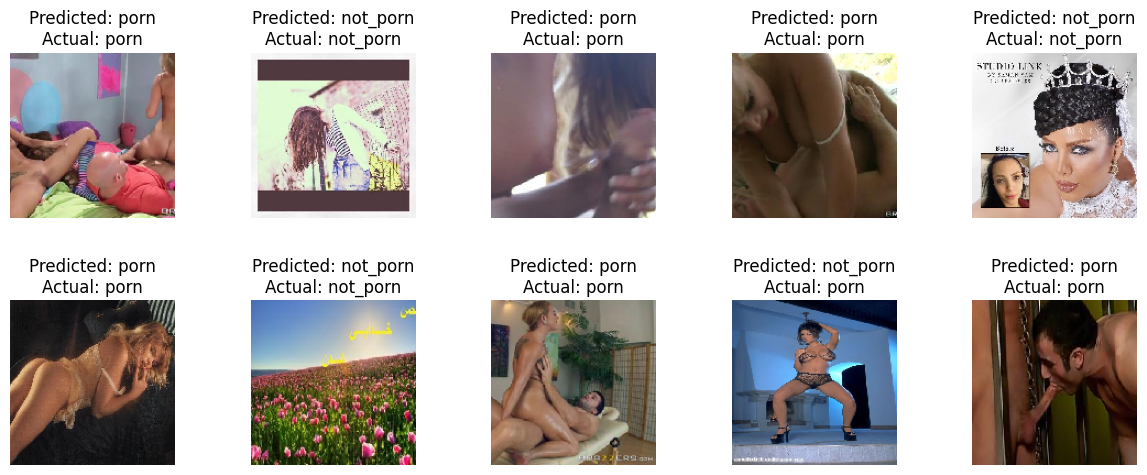

In [9]:
test_images, test_labels = next(test_generator)

predictions = model.predict(test_images)

# Function to decode the predictions
def decode_predictions(preds, threshold=0.5):
    return ['porn' if pred >= threshold else 'not_porn' for pred in preds]
decoded_predictions = decode_predictions(predictions)

# Plot the test images with their predicted labels
plt.figure(figsize=(15, 15))
for i in range(len(test_images)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {decoded_predictions[i]}\nActual: {'porn' if test_labels[i] == 1 else 'not_porn'}")
    plt.axis('off')

# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.5)
plt.show()

In [10]:
model.save('model_v1.h5')